### Import Modules and Data

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPRegressor

In [61]:
df_ger = pd.read_csv("data/preprocessed_survey_results_encoded.csv")

#### Helper Functions


In [62]:
def calc_scores(estimators, x_test, y_test) -> (list, list, list, list, list):
    """
    Calculates the scores from multiple estimators. For example of cross validations.

    :param estimators: list of estimators
    :param x_test: x test split
    :param y_test: y test split
    :return: quadruple of list of the scores
    """
    r2_scores = []
    mae_scores =  []
    mape_scores = []
    rmse_scores = []
    max_scores = []
    for estimator in estimators:
        predictions = estimator.predict(x_test)
        r2_scores.append(metrics.r2_score(y_test, predictions))
        mae_scores.append(metrics.mean_absolute_error(y_test, predictions))
        mape_scores.append(metrics.mean_absolute_percentage_error(y_test, predictions))
        rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
        max_scores.append(metrics.max_error(y_test, predictions))

    return r2_scores, mae_scores, mape_scores, rmse_scores, max_scores

## Multi-Layer-Perceptron

#### Divide Dataset into Train and Test Data

In [63]:
x = df_ger[['YearsCode', 'Age', 'OrgSize', 'in-person', 'remote']]

# x = df_reg[['YearsCode', 'OrgSize', 'Age', 'Bachelor’s degree','Doctoral degree', 'Master’s degree', 'Primary school','Professional degree', 'Secondary school', 'University courses','in-person', 'remote']]

# x = df_reg[['YearsCode', 'OrgSize', 'Age', 'Bachelor’s degree','Doctoral degree', 'Master’s degree', 'Primary school','Professional degree', 'Secondary school', 'University courses','in-person', 'remote', 'APL', 'Assembly', 'Bash/Shell', 'C', 'C#','C++', 'COBOL', 'Clojure', 'Crystal', 'Dart', 'Delphi', 'Elixir','Erlang', 'F#', 'Fortran', 'Go', 'Groovy', 'HTML/CSS', 'Haskell','Java', 'JavaScript', 'Julia', 'Kotlin', 'LISP', 'Lua', 'MATLAB','OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Python', 'R','Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift','TypeScript', 'VBA']]

# x = df_reg[['YearsCode', 'OrgSize', 'Age', 'Bachelor’s degree','Doctoral degree', 'Master’s degree', 'Primary school','Professional degree', 'Secondary school', 'University courses','in-person', 'remote', 'APL', 'Assembly', 'Bash/Shell', 'C', 'C#','C++', 'COBOL', 'Clojure', 'Crystal', 'Dart', 'Delphi', 'Elixir','Erlang', 'F#', 'Fortran', 'Go', 'Groovy', 'HTML/CSS', 'Haskell','Java', 'JavaScript', 'Julia', 'Kotlin', 'LISP', 'Lua', 'MATLAB','OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Python', 'R','Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift','TypeScript', 'VBA', 'Academic researcher', 'Blockchain','Cloud infrastructure engineer', 'Data or business analyst','Data scientist or machine learning specialist','Database administrator', 'Designer', 'DevOps specialist','Developer, QA or test', 'Developer, back-end','Developer, desktop or enterprise applications','Developer, embedded applications or devices', 'Developer, front-end','Developer, full-stack', 'Developer, game or graphics','Developer, mobile', 'Educator', 'Engineer, data','Engineer, site reliability', 'Engineering manager','Marketing or sales professional', 'Other (please specify):','Product manager', 'Project manager', 'Scientist','Security professional', 'Senior Executive (C-Suite, VP, etc.)','Student', 'System administrator']]

y = df_ger['Salary']

# scaler = MinMaxScaler(feature_range=(0,1))
# scaler.fit(x)
# x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)

# normalizer = Normalizer()
# normalizer.fit(x)
# x = pd.DataFrame(normalizer.transform(x), index=x.index, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)
folds = KFold(n_splits=10, shuffle=True, random_state=100)

#### RELU activation function

Samples: [ 75830.57835771  68343.35919895 104733.47933945  65954.22698008
  62874.94738701]
R2:      0.047
MAE:     16159
MAPE:    0.25
RMSE:    19816
MAX:     64153


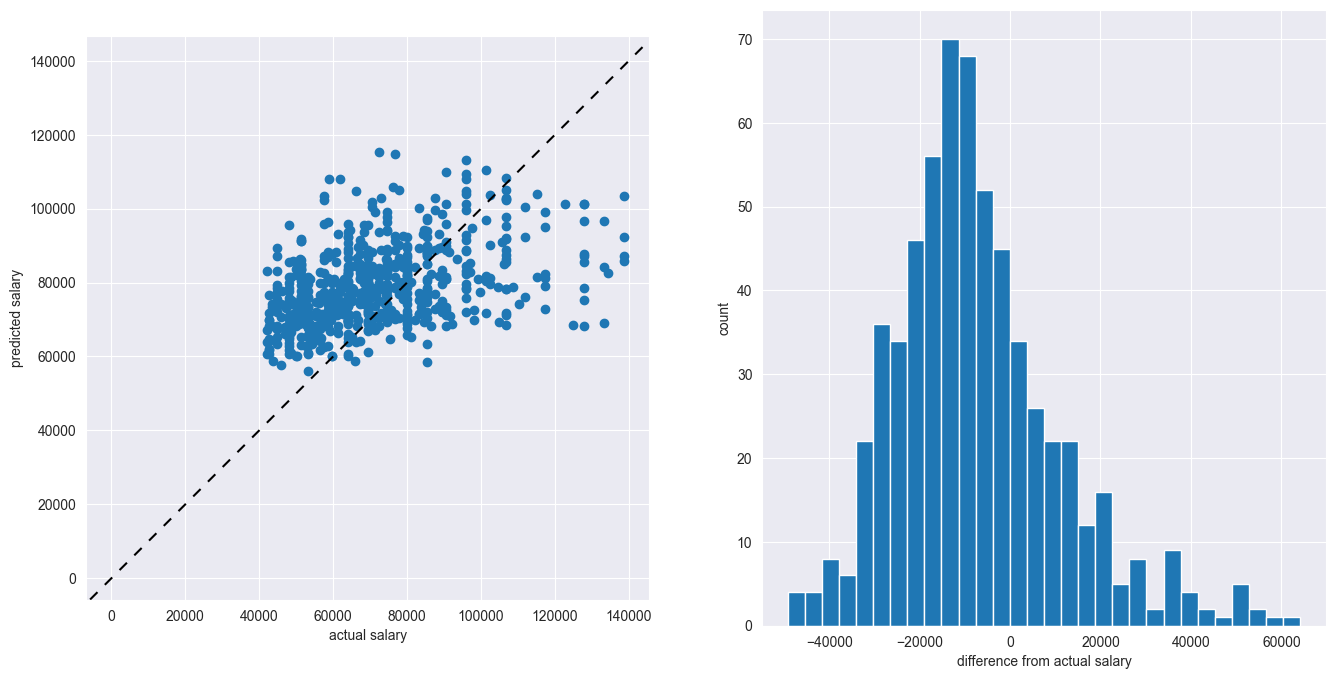

In [64]:
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 20, 3), activation='relu', alpha=0.05, learning_rate='adaptive', learning_rate_init=0.1, max_iter=5000, momentum=0.01, solver='adam')
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 30, 10, 3), activation='relu', alpha=0.05, learning_rate='adaptive', learning_rate_init=0.1, max_iter=5000, momentum=0.01, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)

axs[0].set_aspect(np.diff(axs[0].get_xlim())[0] / np.diff(axs[0].get_ylim())[0])
axs[1].set_aspect(np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0])

plt.show()

#### Logistic activation function (3 layers)

Samples: [72674.34590482 72674.34590482 72674.34590482 72674.34590482
 72674.34590482]
R2:      -0.002
MAE:     16091
MAPE:    0.238
RMSE:    20317
MAX:     65962


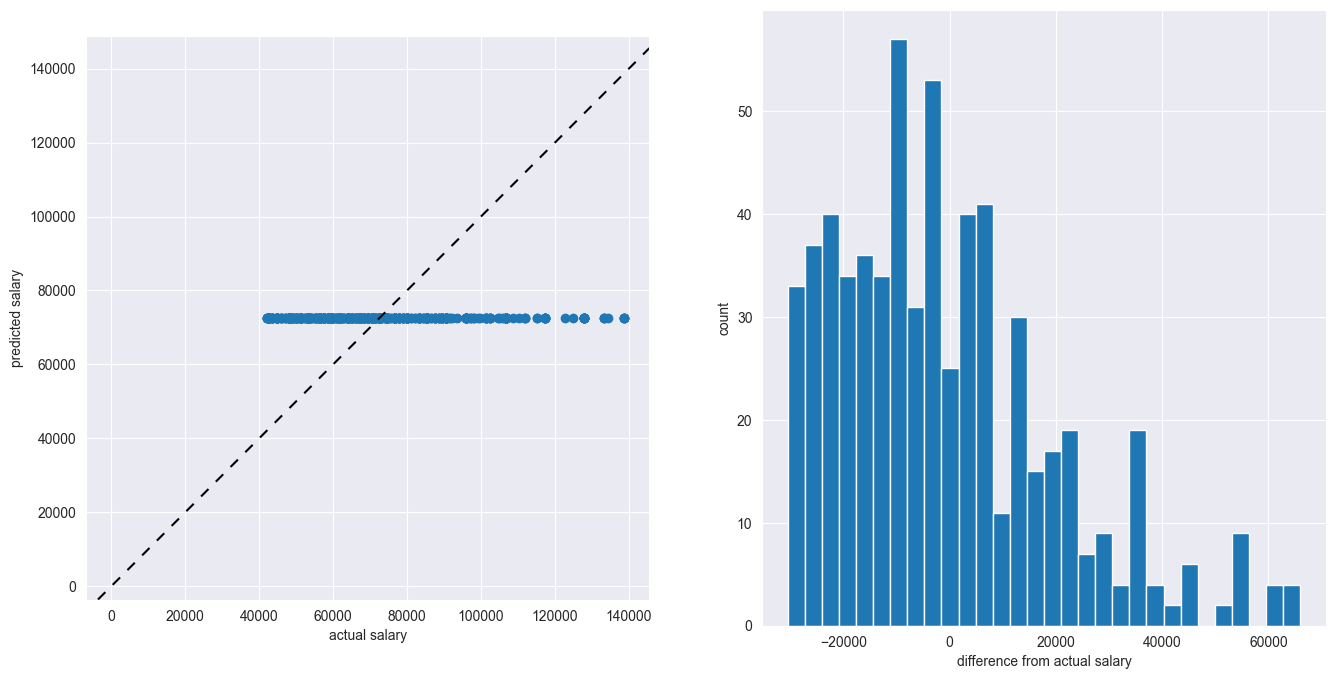

In [65]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 20, 3), activation='logistic', learning_rate_init=1, max_iter=5000, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)

axs[0].set_aspect(np.diff(axs[0].get_xlim())[0] / np.diff(axs[0].get_ylim())[0])
axs[1].set_aspect(np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0])

plt.show()

#### Logistic activation function (1 layer)

Samples: [74162.13263878 67167.15413854 77481.71651489 66304.63693984
 66704.32563096]
R2:      0.124
MAE:     14964
MAPE:    0.22
RMSE:    18993
MAX:     65342


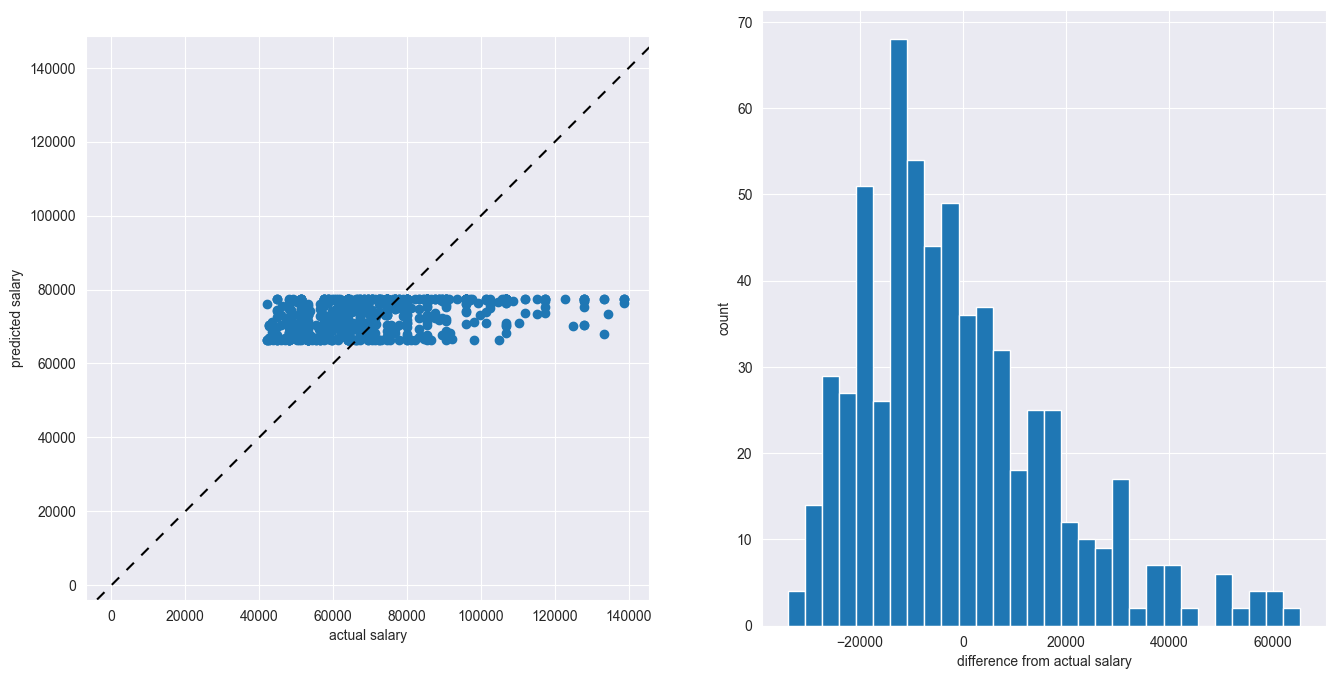

In [66]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200,), activation='logistic', alpha=0.05, learning_rate='adaptive', learning_rate_init=0.1, max_iter=5000, momentum=0.01, solver='adam')

mlp_regressor.fit(x_train, y_train)
prediction_mlp = mlp_regressor.predict(x_test)

r2_scores, mae_scores, mape_scores, rmse_scores, max_scores = calc_scores([mlp_regressor], x_test, y_test)
print("Samples:", prediction_mlp[:5])
print("R2:     ", np.round(np.mean(r2_scores), 3))
print("MAE:    ", np.mean(mae_scores).astype(int))
print("MAPE:   ", np.round(np.mean(mape_scores), 3))
print("RMSE:   ", np.mean(rmse_scores).astype(int))
print("MAX:    ", np.max(max_scores).astype(int))

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].scatter(x=y_test, y=prediction_mlp)
axs[0].axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)))
axs[0].axis('square')
axs[0].set(xlabel="actual salary", ylabel="predicted salary")
axs[1].set(xlabel="difference from actual salary", ylabel="count")
axs[1].hist((y_test-prediction_mlp), bins=30)

axs[0].set_aspect(np.diff(axs[0].get_xlim())[0] / np.diff(axs[0].get_ylim())[0])
axs[1].set_aspect(np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0])

plt.show()